Leer los datos marketing_campaing.csv y realizar una segmentacion
de sus clientes basados en almenos 4 atributos. Realizar un perfilado y justificar con datos y graficos cada clister
Estos datos pertenecen a caracteriscitacs cualitativas de los clientes que mas engagement tienen con un un portal web
Este portal quiere saber como adaptar mejor sus productos y servicisio a sus mejores 
cleintes para incentivar que sigan ligaos a la compañia y enternder mejor sus guistos y su tipo de vinculacion


### Attributes

#### People
ID: Customer's unique identifier <br>
Year_Birth: Customer's birth year <br>
Education: Customer's education level <br>
Marital_Status: Customer's marital status <br>
Income: Customer's yearly household income <br>
Kidhome: Number of children in customer's household <br>
Teenhome: Number of teenagers in customer's household <br>
Dt_Customer: Date of customer's enrollment with the company <br>
Recency: Number of days since customer's last purchase <br>
Complain: 1 if customer complained in the last 2 years, 0 otherwise <br>

#### Products
MntWines: Amount spent on wine in last 2 years <br>
MntFruits: Amount spent on fruits in last 2 years<br>
MntMeatProducts: Amount spent on meat in last 2 years<br>
MntFishProducts: Amount spent on fish in last 2 years<br>
MntSweetProducts: Amount spent on sweets in last 2 years<br>
MntGoldProds: Amount spent on gold in last 2 years<br>

#### Promotion
NumDealsPurchases: Number of purchases made with a discount<br>
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise<br>

#### Place
NumWebPurchases: Number of purchases made through the company’s web site<br>
NumCatalogPurchases: Number of purchases made using a catalogue<br>
NumStorePurchases: Number of purchases made directly in stores<br>
NumWebVisitsMonth: Number of visits to company’s web site in the last month<br>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [2]:
def tecnicaCodo(normalizedDataFrame):
    distances = []
    range_n_clusters = [2,3,4,5,6,7,8,9,10]
    for n_cluster in range_n_clusters:
        kmeans = KMeans(n_clusters=n_cluster, max_iter=10)
        kmeans.fit(normalizedDataFrame)
        distances.append(kmeans.inertia_)
    plt.figure(figsize=(12,6))
    fig, ax = plt.subplots()
    ax.plot(distances)
    plt.show()

In [3]:
data = pd.read_csv('./marketing_campaign.csv', sep='\t')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


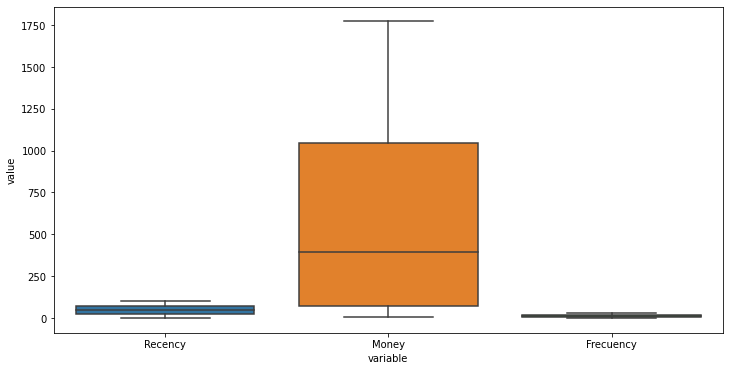

<Figure size 864x432 with 0 Axes>

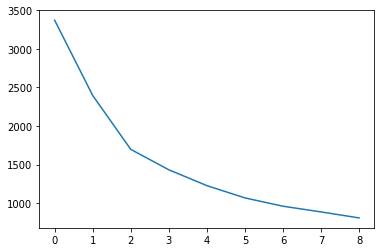

In [23]:
# I will try to do a RMF
# Recency is already given
# Money can be calculated with different Mnt fields
# Frecuency can be calculated with NumPurchases fields

###
#   DATA PREPARATION
###

subdata = data[['ID','Recency','MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds','NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']]
# moneyColumns = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
# frecuencyColumns = ['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']
subdata['Money'] = subdata['MntWines'] + subdata['MntFruits'] + subdata['MntMeatProducts'] + subdata['MntFishProducts'] + subdata['MntSweetProducts'] + subdata['MntGoldProds'] 
subdata['Frecuency'] = subdata['NumWebPurchases'] + subdata['NumCatalogPurchases'] + subdata['NumStorePurchases']

subdata = subdata[['ID','Recency','Money','Frecuency']]

# Null check
# print("null check")
# print(data.isna().sum())
## Only Income has null values. I am not taking that column into account so it does not matter

# Data intergrity
#print("---subdata---")
#print(subdata.describe())
# ---subdata---
#                  ID      Recency        Money    Frecuency
# count   2240.000000  2240.000000  2240.000000  2240.000000
# mean    5592.159821    49.109375   605.798214    12.537054
# std     3246.662198    28.962453   602.249288     7.205741
# min        0.000000     0.000000     5.000000     0.000000
# 25%     2828.250000    24.000000    68.750000     6.000000
# 50%     5458.500000    49.000000   396.000000    12.000000
# 75%     8427.750000    74.000000  1045.500000    18.000000
# max    11191.000000    99.000000  2525.000000    32.000000

# There are entries with 0 as its ID, recency and frecuency. That might not be good so I will take a look

# >>> subdata[subdata['Frecuency']==0].shape 
# (6, 4)
# >>> subdata[subdata['Recency']==0].shape
# (28, 4)

# We would have to ask bussiness if this is okay
# Due to lack of time we are not going to try to fix the data

# clip max Money spent
subdata['Money'] = np.clip(subdata['Money'], 0, np.quantile(subdata['Money'], 0.95))

plt.figure(figsize=(12,6))
sns.boxplot(x="variable", y="value", data=pd.melt(subdata[['Recency', 'Money', 'Frecuency']]))
plt.show()

###
#   NORMALIZE DATA
###

col_variables=['Recency','Money','Frecuency']
scaler = preprocessing.StandardScaler()
scaler.fit(subdata[col_variables])
subdata_norm = scaler.transform(subdata[col_variables])
subdata_norm = pd.DataFrame(subdata_norm)
subdata_norm.columns = col_variables

tecnicaCodo(subdata_norm)

model = KMeans(n_clusters=3, max_iter=10)
model.fit(subdata_norm)
subdata['cluster'] = model.labels_

# Recency

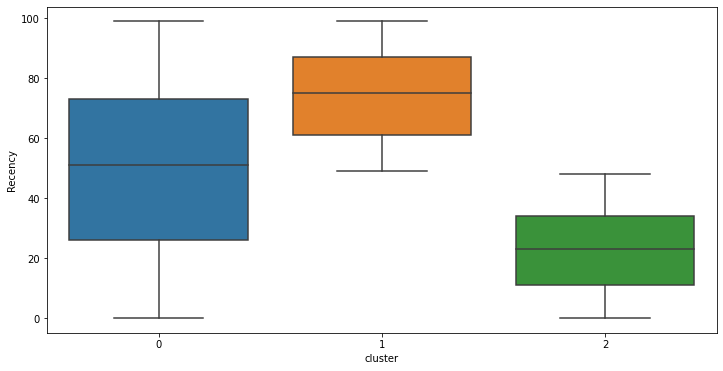

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(x='cluster',y='Recency',data=subdata)
plt.show()

# Money

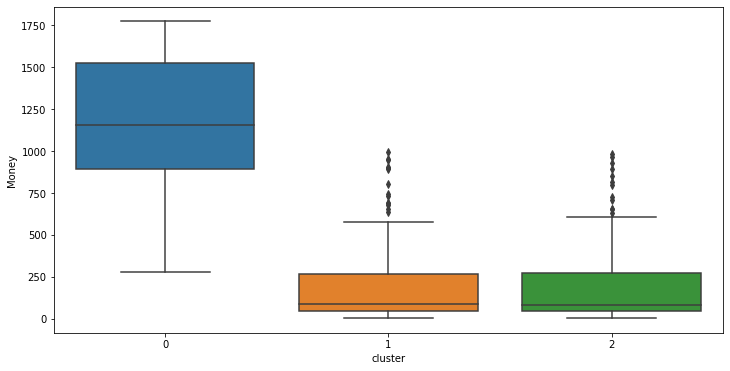

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(x='cluster',y='Money',data=subdata)
plt.show()

# Frecuency

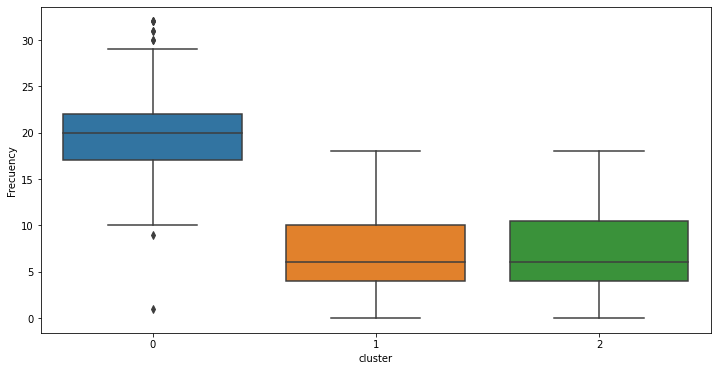

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(x='cluster',y='Frecuency',data=subdata)
plt.show()